<a href="https://colab.research.google.com/github/irakozej/ML-Summatives/blob/main/ML_Summatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Generate data
num_rows = 200  # Adjust volume as needed
devices = np.random.randint(1, 21, num_rows)  # 1 to 20 devices
network_types = np.random.choice(['Wi-Fi', '4G', '5G'], num_rows)
bandwidth_limits = np.random.choice([10, 50, 100, 500], num_rows)  # Mbps
time_of_day = np.random.choice(['Morning', 'Afternoon', 'Night'], num_rows)

In [4]:
# Simulating internet speed with some randomness
speed = 100 - (devices * np.random.uniform(2, 5, num_rows))  # Speed drops as devices increase
speed += np.random.normal(0, 5, num_rows)  # Adding noise
speed = np.clip(speed, 1, None)  # Ensuring no negative speeds

In [6]:
# Create DataFrame
df = pd.DataFrame({
    'Devices_Connected': devices,
    'Network_Type': network_types,
    'Bandwidth_Limit': bandwidth_limits,
    'Time_of_Day': time_of_day,
    'Internet_Speed': speed  # Target variable
})

In [7]:
# Save dataset
df.to_csv('internet_speed_dataset.csv', index=False)

# Display first few rows
df.head()

,Devices_Connected,Network_Type,Bandwidth_Limit,Time_of_Day,Internet_Speed
0,7,4G,100,Morning,70.016461
1,20,5G,10,Morning,14.860776
2,15,5G,500,Night,26.630490
3,11,5G,10,Morning,81.437117
4,8,5G,10,Night,80.986019


In [8]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the file in your Drive
df.to_csv('/content/drive/My Drive/internet_speed_dataset.csv', index=False)
print("File saved to Google Drive!")

Mounted at /content/drive
File saved to Google Drive!


## Data Exploration and Visualization

In [10]:
# Load dataset
df = pd.read_csv('internet_speed_dataset.csv')

In [11]:
# Display dataset info
print("Dataset Overview:\n")
print(df.info())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Devices_Connected  200 non-null    int64  
 1   Network_Type       200 non-null    object 
 2   Bandwidth_Limit    200 non-null    int64  
 3   Time_of_Day        200 non-null    object 
 4   Internet_Speed     200 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB
None


In [12]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Devices_Connected    0
Network_Type         0
Bandwidth_Limit      0
Time_of_Day          0
Internet_Speed       0
dtype: int64


In [13]:
# Show basic statistics
print("\nDataset Summary:\n")
print(df.describe())


Dataset Summary:

       Devices_Connected  Bandwidth_Limit  Internet_Speed
count         200.000000       200.000000      200.000000
mean            9.860000       169.300000       65.027084
std             5.815453       204.055638       23.145030
min             1.000000        10.000000        6.574405
25%             5.000000        10.000000       50.104462
50%             9.000000        50.000000       66.998626
75%            15.000000       500.000000       83.433075
max            20.000000       500.000000      110.578255


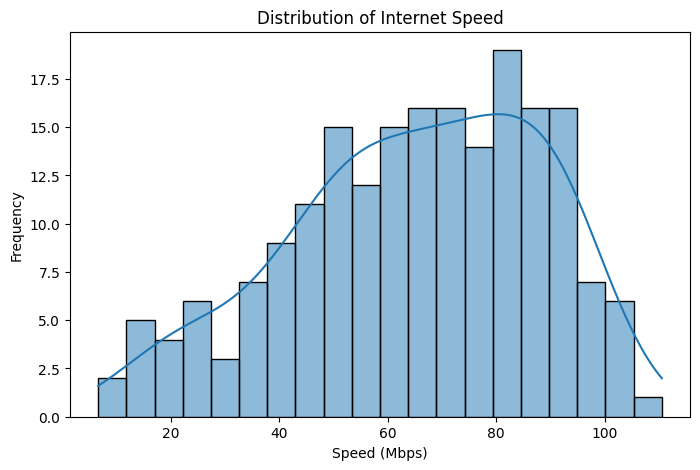

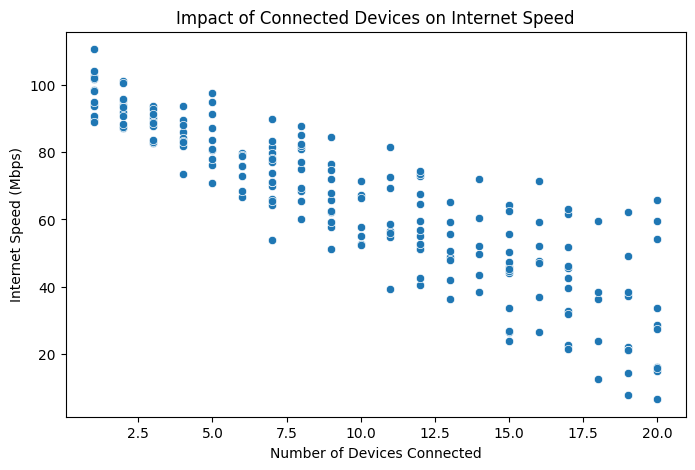

In [14]:
# Visualizations
plt.figure(figsize=(8,5))
sns.histplot(df['Internet_Speed'], bins=20, kde=True)
plt.title('Distribution of Internet Speed')
plt.xlabel('Speed (Mbps)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Devices_Connected'], y=df['Internet_Speed'])
plt.title('Impact of Connected Devices on Internet Speed')
plt.xlabel('Number of Devices Connected')
plt.ylabel('Internet Speed (Mbps)')
plt.show()